In [ ]:
!pip install "monai-weekly[all]" "monailabel-weekly"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
print("============查看GPU信息================")
# 查看GPU信息
!/opt/bin/nvidia-smi
print("==============查看pytorch版本==============")
# 查看pytorch版本
import torch
print(torch.__version__)
print("============查看虚拟机硬盘容量================")
# 查看虚拟机硬盘容量
!df -lh
print("============查看cpu配置================")
# 查看cpu配置
!cat /proc/cpuinfo | grep model\ name
print("=============查看内存容量===============")
# 查看内存容量
!cat /proc/meminfo | grep MemTotal

============查看GPU信息================
Tue Feb 14 23:32:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    50W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                    

In [ ]:
!pip install scTAPE scanpy pybiomart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Colab_data/'TAPE RNA-seq integration' /content/

In [ ]:
# Requiremnts
import os
import shutil
import tempfile
import glob
import re
import matplotlib
import numpy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Transformation

In [ ]:
All_muscle_test = pd.read_csv("TAPE RNA-seq integration/All_muscle_H_combat_tmm_9231.csv")
All_muscle_test.to_csv('All_muscle_test.txt', index=None, sep='\t')

In [ ]:
GeneID_anno = pd.read_csv("Annotation_dict_from_GTEx.csv")
GeneID_anno

,GeneID,GeneSymbol
0,ENSG00000223972,DDX11L1
1,ENSG00000227232,WASH7P
2,ENSG00000278267,MIR6859-1
3,ENSG00000243485,MIR1302-2HG
4,ENSG00000237613,FAM138A
...,...,...
56195,ENSG00000198695,MT-ND6
56196,ENSG00000210194,MT-TE
56197,ENSG00000198727,MT-CYB
56198,ENSG00000210195,MT-TT


In [ ]:
from pybiomart import Dataset

dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

Ensembl = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name', "transcript_start", "transcript_end"])
Ensembl

,Gene stable ID,Gene name,Transcript start (bp),Transcript end (bp)
0,ENSG00000210049,MT-TF,577,647
1,ENSG00000211459,MT-RNR1,648,1601
2,ENSG00000210077,MT-TV,1602,1670
3,ENSG00000210082,MT-RNR2,1671,3229
4,ENSG00000209082,MT-TL1,3230,3304
...,...,...,...,...
264740,ENSG00000198216,CACNA1E,181732566,181767884
264741,ENSG00000198216,CACNA1E,181776101,181783784
264742,ENSG00000198216,CACNA1E,181793668,181813262
264743,ENSG00000159388,BTG2,203305491,203309569


In [ ]:
Ensembl.to_csv('GeneID_anno_length_full.txt', index=False, sep='\t')

In [ ]:
Ensembl=Ensembl.rename(columns = {'Gene stable ID':'GeneID'})
GeneID_anno_length = pd.merge(GeneID_anno, Ensembl, how='left', on='GeneID')
GeneID_anno_length

,GeneID,GeneSymbol,Gene name,Transcript start (bp),Transcript end (bp)
0,ENSG00000223972,DDX11L1,DDX11L1,12010.0,13670.0
1,ENSG00000227232,WASH7P,WASH7P,14404.0,29570.0
2,ENSG00000278267,MIR6859-1,MIR6859-1,17369.0,17436.0
3,ENSG00000243485,MIR1302-2HG,MIR1302-2HG,29554.0,31097.0
4,ENSG00000243485,MIR1302-2HG,MIR1302-2HG,30267.0,31109.0
...,...,...,...,...,...
232388,ENSG00000198695,MT-ND6,MT-ND6,14149.0,14673.0
232389,ENSG00000210194,MT-TE,MT-TE,14674.0,14742.0
232390,ENSG00000198727,MT-CYB,MT-CYB,14747.0,15887.0
232391,ENSG00000210195,MT-TT,MT-TT,15888.0,15953.0


# Tabular sapians

Reading single-cell dataset, this may take 1 min
Reading dataset is done
Normalizing raw single cell data with scanpy.pp.normalize_total
Generating cell fractions using Dirichlet distribution without prior info (actually random)
RANDOM cell fractions is generated
You set sparse as True, some cell's fraction will be zero, the probability is 0.5
Sampling cells to compose pseudo-bulk data


5000it [02:08, 39.03it/s]


Sampling is done
Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Cutting variance...
Finding intersected genes...
Intersected gene number is  7227
Scaling...


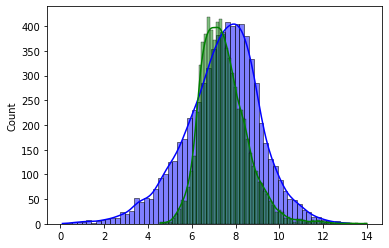

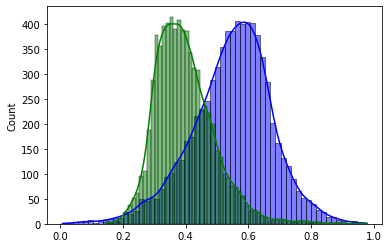

training data shape is  (5000, 7227) 
test data shape is  (1221, 7227)
Start training


100%|██████████| 128/128 [00:58<00:00,  2.21it/s]


Training is done
prediction loss is:
reconstruction loss is:
Notice that you are using parameters: mode=overall and adaptive=True
Model is saved without defined name
Start adaptive training for all the samples
Adaptive stage is done


In [ ]:
from TAPE import Deconvolution

Sigm, Pred = Deconvolution('TAPE RNA-seq integration/TS_Muscle_ref.txt', 'All_muscle_test.txt',sep='\t',
                           datatype='counts', genelenfile='TAPE RNA-seq integration/GeneID_anno_length_full.txt',
                           mode='overall', adaptive=True,
                           save_model_name = None)

In [ ]:
Sigm.to_csv('TAPE_Sigm_9231_TS.csv')
Sigm

,NOC2L,PERM1,AGRN,SDF4,UBE2J2,ACAP3,INTS11,CPTP,DVL1,MXRA8,...,GDI1,FAM50A,PLXNA3,FAM3A,DKC1,MPP1,F8,FUNDC2,BRCC3,VBP1
capillary endothelial cell,0.685406,0.198994,0.492958,0.776350,0.901869,0.636173,0.813656,0.643793,0.689949,0.705182,...,0.779514,0.887021,0.688438,0.733603,0.909512,0.947451,1.202823,1.102181,0.771595,1.031392
"cd4-positive, alpha-beta t cell",0.179733,0.057690,0.074963,0.238412,0.202618,0.221634,0.225429,0.109977,0.121326,0.157754,...,0.255803,0.226545,0.347788,0.161428,0.300585,0.254786,0.232887,0.317626,0.303824,0.307673
"cd8-positive, alpha-beta t cell",0.409046,0.093920,0.274218,0.437178,0.540944,0.407098,0.458581,0.397606,0.366892,0.234495,...,0.471492,0.517575,0.494435,0.420758,0.641858,0.530454,0.724234,0.666592,0.520184,0.639443
endothelial cell of artery,0.138928,0.022218,0.139092,0.030291,0.115997,0.000000,0.095761,0.127496,0.104653,0.019052,...,0.111166,0.077414,0.080264,0.000000,0.086748,0.000000,0.206496,0.111410,0.089097,0.112400
endothelial cell of lymphatic vessel,0.000000,0.144388,0.000000,0.000000,0.000000,0.000000,0.000000,0.026727,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
endothelial cell of vascular tree,0.594529,0.000000,0.570103,0.509200,0.754947,0.412919,0.534175,0.364357,0.430483,0.511367,...,0.578928,0.607520,0.426847,0.459925,0.682776,0.576483,1.221872,0.770643,0.446437,0.740881
erythrocyte,0.308050,0.286506,0.191593,0.304360,0.391281,0.244172,0.432213,0.414195,0.420103,0.258257,...,0.299084,0.410075,0.236679,0.316635,0.361824,0.410858,0.512871,0.481466,0.319139,0.441311
fast muscle cell,0.833483,1.646143,0.386132,0.590114,0.406468,0.752804,0.859557,0.908828,1.365571,0.341599,...,0.584018,0.571476,0.165434,0.428869,0.346158,0.125868,0.193950,0.669469,0.279742,0.415283
macrophage,0.338213,0.013118,0.233929,0.418718,0.414730,0.321955,0.375218,0.233854,0.293036,0.364735,...,0.375057,0.424649,0.276214,0.351250,0.434531,0.539104,0.567320,0.527524,0.350591,0.477304
mast cell,0.394710,0.150077,0.258496,0.842076,0.565994,0.592571,0.525493,0.312633,0.388746,0.474091,...,0.576700,0.721384,0.375858,0.783116,0.734021,1.139296,0.630552,0.891743,0.686343,0.769031


In [ ]:
Pred.to_csv('TAPE_Pred_9231_TS.csv')
Pred

,capillary endothelial cell,"cd4-positive, alpha-beta t cell","cd8-positive, alpha-beta t cell",endothelial cell of artery,endothelial cell of lymphatic vessel,endothelial cell of vascular tree,erythrocyte,fast muscle cell,macrophage,mast cell,mature nk t cell,mesenchymal stem cell,mesothelial cell,pericyte cell,skeletal muscle satellite stem cell,slow muscle cell,smooth muscle cell,t cell,tendon cell
Unnamed: 0,,,,,,,,,,,,,,,,,,,
CDM-01,0.064127,0.052622,0.008718,0.001980,0.001239,0.089384,0.0,0.142994,0.103213,0.004891,0.022948,0.016623,0.045256,0.028922,0.128690,0.151028,0.000000,0.0,0.137366
CDM-02,0.060825,0.049107,0.002275,0.004890,0.003332,0.085782,0.0,0.126027,0.113177,0.003541,0.022438,0.021948,0.051608,0.034155,0.128856,0.140703,0.000587,0.0,0.150750
CDM-03,0.070485,0.045860,0.000000,0.005101,0.000000,0.087107,0.0,0.154357,0.111386,0.000000,0.022143,0.014495,0.046868,0.030434,0.121824,0.151069,0.000000,0.0,0.138870
CDM-04,0.067716,0.039205,0.000000,0.000000,0.000000,0.068116,0.0,0.153694,0.110539,0.000000,0.022982,0.028306,0.046471,0.024737,0.124534,0.159497,0.000000,0.0,0.154203
CDM-05,0.081762,0.034104,0.000000,0.000000,0.000000,0.063490,0.0,0.185929,0.095213,0.000000,0.040575,0.003192,0.034798,0.000000,0.127688,0.172403,0.000000,0.0,0.160846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_FM3814,0.071522,0.023135,0.000000,0.000000,0.000000,0.041225,0.0,0.191963,0.096772,0.000000,0.030033,0.016061,0.037497,0.000000,0.137001,0.168764,0.005490,0.0,0.180537
9_FM3835,0.070388,0.017347,0.000000,0.000000,0.000000,0.040465,0.0,0.220612,0.090456,0.000000,0.026977,0.011857,0.029316,0.000000,0.150349,0.167994,0.000944,0.0,0.173293
9_HL_VL_AMP08,0.064029,0.048431,0.006113,0.000000,0.000000,0.062411,0.0,0.204089,0.104012,0.000000,0.030871,0.003010,0.033093,0.000000,0.123807,0.192977,0.000000,0.0,0.127157


# GSE143704 (Micheli et al, 2020)

Reading single-cell dataset, this may take 1 min
Reading dataset is done
Normalizing raw single cell data with scanpy.pp.normalize_total
Generating cell fractions using Dirichlet distribution without prior info (actually random)
RANDOM cell fractions is generated
You set sparse as True, some cell's fraction will be zero, the probability is 0.5
Sampling cells to compose pseudo-bulk data


5000it [00:56, 88.66it/s]


Sampling is done
Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Cutting variance...
Finding intersected genes...
Intersected gene number is  12839
Scaling...


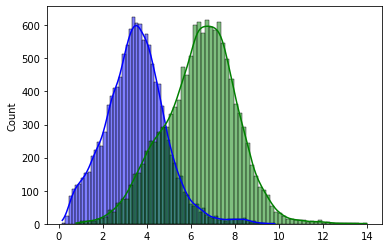

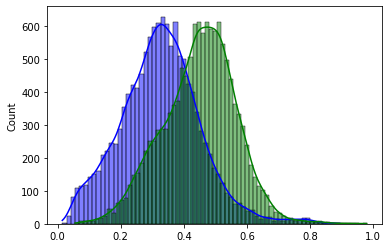

training data shape is  (5000, 12839) 
test data shape is  (1221, 12839)
Start training


100%|██████████| 128/128 [01:04<00:00,  1.97it/s]


Training is done
prediction loss is:
reconstruction loss is:
Notice that you are using parameters: mode=overall and adaptive=True
Model is saved without defined name
Start adaptive training for all the samples
Adaptive stage is done


In [ ]:
from TAPE import Deconvolution

Sigm, Pred = Deconvolution('TAPE RNA-seq integration/Micheli_ref.txt', 'TAPE RNA-seq integration/All_muscle_test.txt',sep='\t',
                           datatype='counts', genelenfile='TAPE RNA-seq integration/GeneID_anno_length_full.txt',
                           mode='overall', adaptive=True,
                           save_model_name = None)

In [ ]:
Sigm.to_csv('TAPE_Sigm_Micheli.csv') #TAPE_Sigm_9231_Micheli
Sigm

,SAMD11,NOC2L,KLHL17,HES4,ISG15,AGRN,C1orf159,TNFRSF4,SDF4,B3GALT6,...,MYH4,PHOSPHO1,VN1R1,PVALB,RAP1GAP,SH2D1B,KRT1,METTL21C,CA1,HBG1
ACTA1+ Mature skeletal muscle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.300675,0.614216,0.000000,0.672909,0.100406,1.249315,0.265442,0.496394,0.000000,0.000000
ACTA2+ MYH11+ MYL9+ Smooth muscle cells,0.064436,0.366106,0.088037,0.642948,0.458716,0.319576,0.187386,0.323671,0.410853,0.264008,...,0.000000,0.304465,0.060768,0.000000,0.351942,0.000000,0.323838,0.000000,0.629587,0.307993
APOD+ CFD+ PLAC9+ Adipocytes,0.338886,0.812391,0.242654,0.972813,1.030399,0.622317,0.408805,0.790217,1.022157,0.641779,...,0.000000,0.077489,0.132816,0.000000,0.115325,0.000000,0.121403,0.000000,0.726243,0.000000
C1QA+ CD74+ Macrophages,0.150713,0.663625,0.208766,0.765673,0.784925,0.449085,0.364338,0.511835,0.774226,0.547712,...,0.000000,0.000000,0.070602,0.000000,0.000000,0.000000,0.067052,0.000000,0.575091,0.000000
CD36+ VWF+ Platelets,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010307,0.000000,0.000000
CLDN5+ PECAM1+ Endothelial,0.049299,0.827855,0.186002,1.117594,1.289615,0.803323,0.415417,1.156294,1.049236,0.668279,...,0.000000,0.000000,0.122795,0.000000,0.212920,0.000000,0.232196,0.000000,0.889035,0.090472
COL1A1+ Fibroblasts,0.451842,0.622130,0.235987,0.705781,0.737064,0.415850,0.315310,0.435626,0.818383,0.500301,...,0.000000,0.000000,0.087136,0.000000,0.000000,0.000000,0.077627,0.000000,0.521123,0.000000
DCN+ GSN+ MYOC+ Fibroblasts,0.296559,0.219673,0.149109,0.147595,0.198844,0.108523,0.118147,0.055645,0.342170,0.190328,...,0.000000,0.000000,0.048293,0.000000,0.000000,0.000000,0.000000,0.013971,0.000000,0.000000
FBN1+ MFAP5+ CD55+ Fibroblasts,0.512169,0.870773,0.813908,0.064496,0.139089,0.705659,0.628764,0.092981,0.761028,0.675263,...,0.000000,0.000000,0.793639,0.000000,0.000000,0.000000,0.000000,0.241313,0.000000,0.000000
HBA1+ Erythroblasts,0.068957,0.467460,0.079777,0.659860,0.638883,0.331424,0.206407,0.470282,0.588609,0.339023,...,0.000000,1.269183,0.062362,0.000000,1.359325,0.000000,1.303910,0.000000,1.555171,0.940772


In [ ]:
Pred.to_csv('TAPE_Pred_Micheli.csv') #TAPE_Pred_9231_Micheli
Pred`

,ACTA1+ Mature skeletal muscle,ACTA2+ MYH11+ MYL9+ Smooth muscle cells,APOD+ CFD+ PLAC9+ Adipocytes,C1QA+ CD74+ Macrophages,CD36+ VWF+ Platelets,CLDN5+ PECAM1+ Endothelial,COL1A1+ Fibroblasts,DCN+ GSN+ MYOC+ Fibroblasts,FBN1+ MFAP5+ CD55+ Fibroblasts,HBA1+ Erythroblasts,ICAM1+ SELE+ VCAM1+ Endothelial,IL7R+ PTPRC+ NKG7+ B/T/NK cells,PAX7+ DLK1+ MuSCs and progenitors,PAX7low MYF5+ MuSCs and progenitors,RGS5+ MYL9+ Pericytes,S100A9+ LYZ+ Inflammatory macrophages
CDM-01,0.218499,0.064582,0.053604,0.021757,0.006117,0.000000,0.000000,0.020977,0.228342,0.083338,0.050484,0.034303,0.214833,0.003164,0.000000,0.000000
CDM-02,0.197672,0.064424,0.042116,0.033205,0.007340,0.000000,0.005831,0.011001,0.238406,0.086715,0.068921,0.025104,0.219265,0.000000,0.000000,0.000000
CDM-03,0.213561,0.068340,0.046636,0.036474,0.009690,0.000000,0.000000,0.010377,0.223774,0.093062,0.065480,0.032080,0.200526,0.000000,0.000000,0.000000
CDM-04,0.209534,0.057268,0.054232,0.046331,0.005165,0.000000,0.007092,0.023172,0.234287,0.091279,0.051781,0.032264,0.187594,0.000000,0.000000,0.000000
CDM-05,0.196983,0.061391,0.032587,0.038758,0.009064,0.000000,0.017164,0.002999,0.237780,0.104394,0.078940,0.055429,0.163499,0.000000,0.000000,0.001011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_FM3814,0.220982,0.055948,0.040468,0.021398,0.000000,0.000000,0.043256,0.000000,0.215288,0.108607,0.049327,0.065279,0.179447,0.000000,0.000000,0.000000
9_FM3835,0.219330,0.063865,0.053664,0.037377,0.000000,0.000000,0.013751,0.012053,0.225096,0.094720,0.055111,0.040435,0.184600,0.000000,0.000000,0.000000
9_HL_VL_AMP08,0.253166,0.051930,0.048891,0.031027,0.000000,0.000000,0.000000,0.000066,0.215331,0.098622,0.048804,0.044814,0.199240,0.008109,0.000000,0.000000
9_JE_VL_AMP05,0.230780,0.081361,0.043615,0.015529,0.006149,0.008457,0.000000,0.000000,0.216879,0.097000,0.068612,0.041602,0.188618,0.000000,0.001399,0.000000


# Trajectory

In [ ]:
! pip install 'matplotlib<3.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0


In [ ]:
! pip install python-igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.3 MB/s eta 0:00:00
  Created wheel for python-igraph: filename=python_igraph-0.10.4-py3-none-any.whl size=9076 sha256=56b27f69b8a470c34e2e5b38142f69d0adc276461f034ee0d15f21fda4f023bb
  Stored in directory: /root/.cache/pip/wheels/04/eb/68/b70fc5f1163b5a3e9e6aaaea5fb57a8ff4c0c4988505a4fe0f
Successfully built python-igraph


In [ ]:
! pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 9.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=a1a9bd478a718c81952f88d081301cbfbaa775c266f6

In [ ]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
#import celltypist
#import scvi
#import scvelo as scv
#from celltypist import models
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

%config InlineBackend.figure_format = 'retina'

# matplot 输出的图片为illustrator可编辑的字体
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 pynndescent==0.5.8


In [ ]:
adata_adj = sc.read('adata_all_muscle_combat_tmm_nounhealthycontrols_9231.h5ad')
adata_adj



AnnData object with n_obs × n_vars = 1177 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Tissue', 'Method', 'Platform', 'Phenotype_3', 'Phenotype_4', 'leiden'
    uns: 'Data_source_colors', 'Method_colors', 'Phenotype_1_colors', 'Phenotype_3_colors', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
category_order_list = ['Control (unexpected death)', 'Control (accident death)', 'Control (intermediate death)', 'Control (ventilator case)', 'Control (slow death)', 'Control (amputee)', 'Control (hyperkalemia)', 'Control (pediatric)', 'Control (others)', 'Myopathy']

adata_adj.obs['Phenotype_3'] = adata_adj.obs['Phenotype_3'].astype('category').cat.set_categories(category_order_list, ordered=True)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


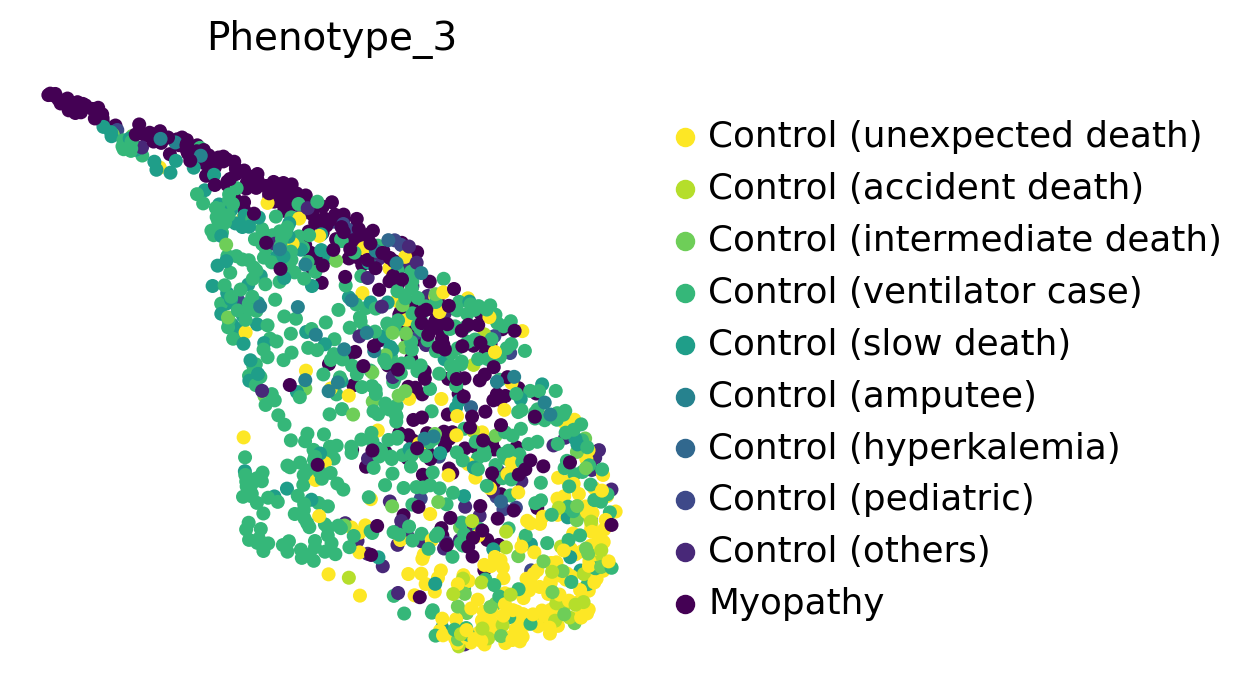

In [ ]:
sc.tl.draw_graph(adata_adj)
sc.pl.draw_graph(adata_adj, color='Phenotype_3', palette= 'viridis_r') #, legend_loc='on data'``

In [ ]:
sc.tl.diffmap(adata_adj)
sc.pp.neighbors(adata_adj, n_neighbors=10, use_rep='X_diffmap')

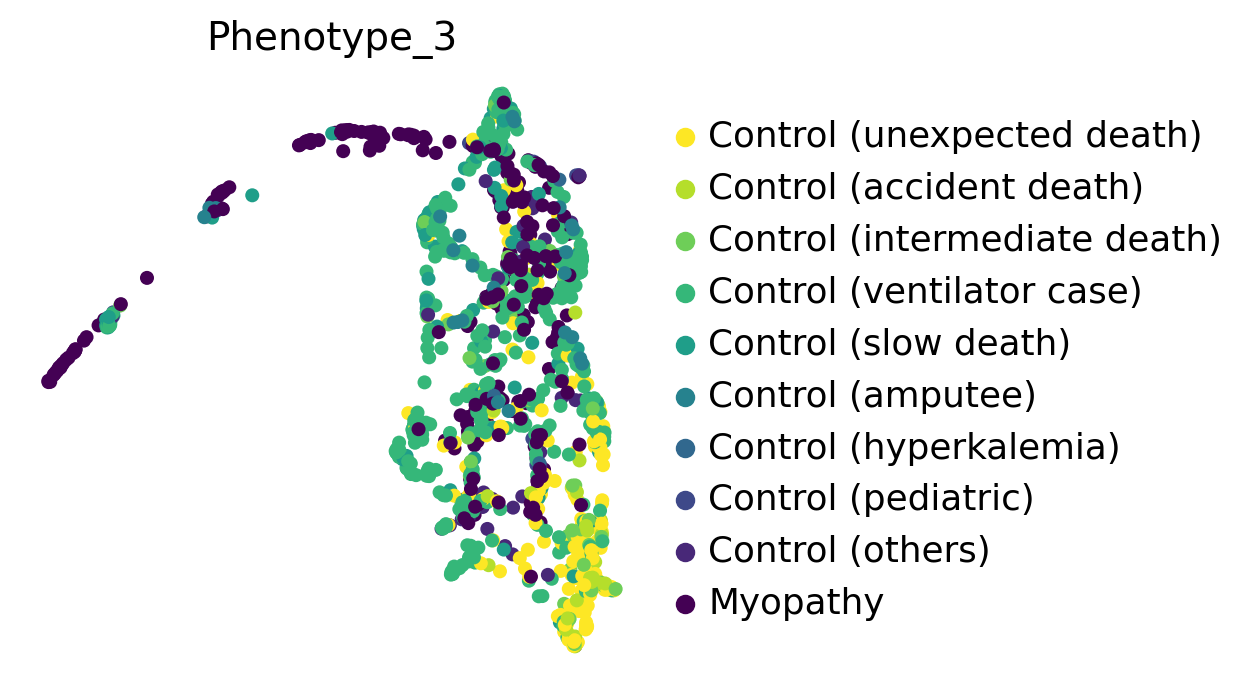

In [ ]:
sc.tl.draw_graph(adata_adj)
sc.pl.draw_graph(adata_adj, color='Phenotype_3') #, legend_loc='on data'

In [ ]:
sc.tl.paga(adata_adj, groups='Phenotype_3')

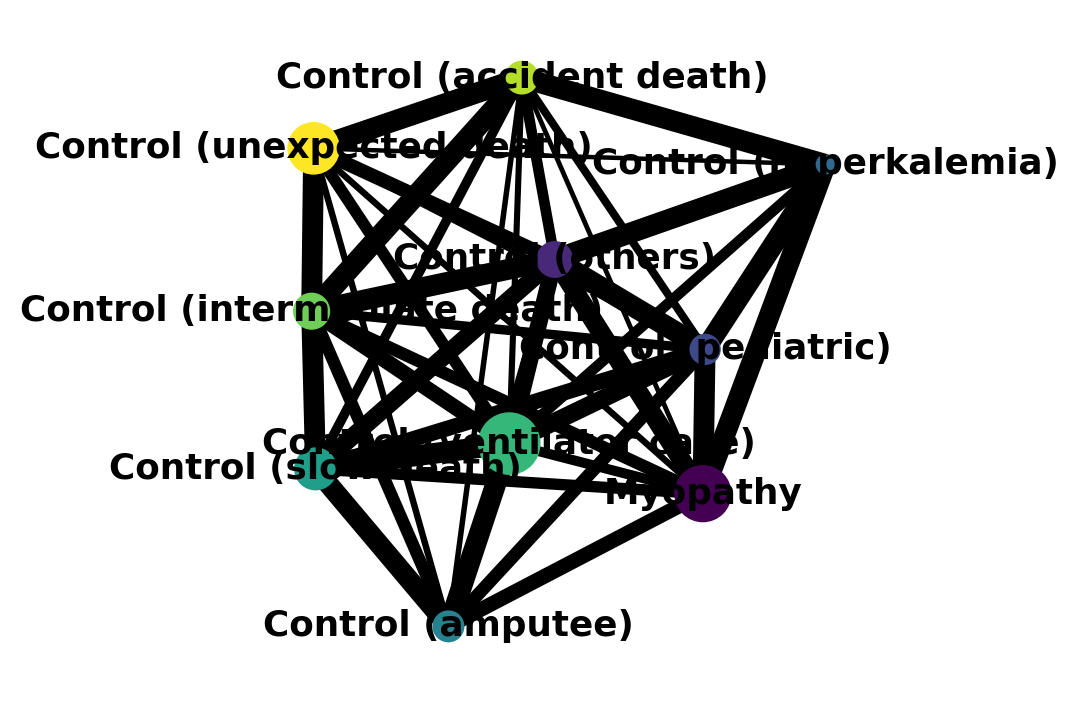

In [ ]:
sc.pl.paga(adata_adj, color=['Phenotype_3'])

In [ ]:
sc.tl.draw_graph(adata_adj, init_pos='paga')

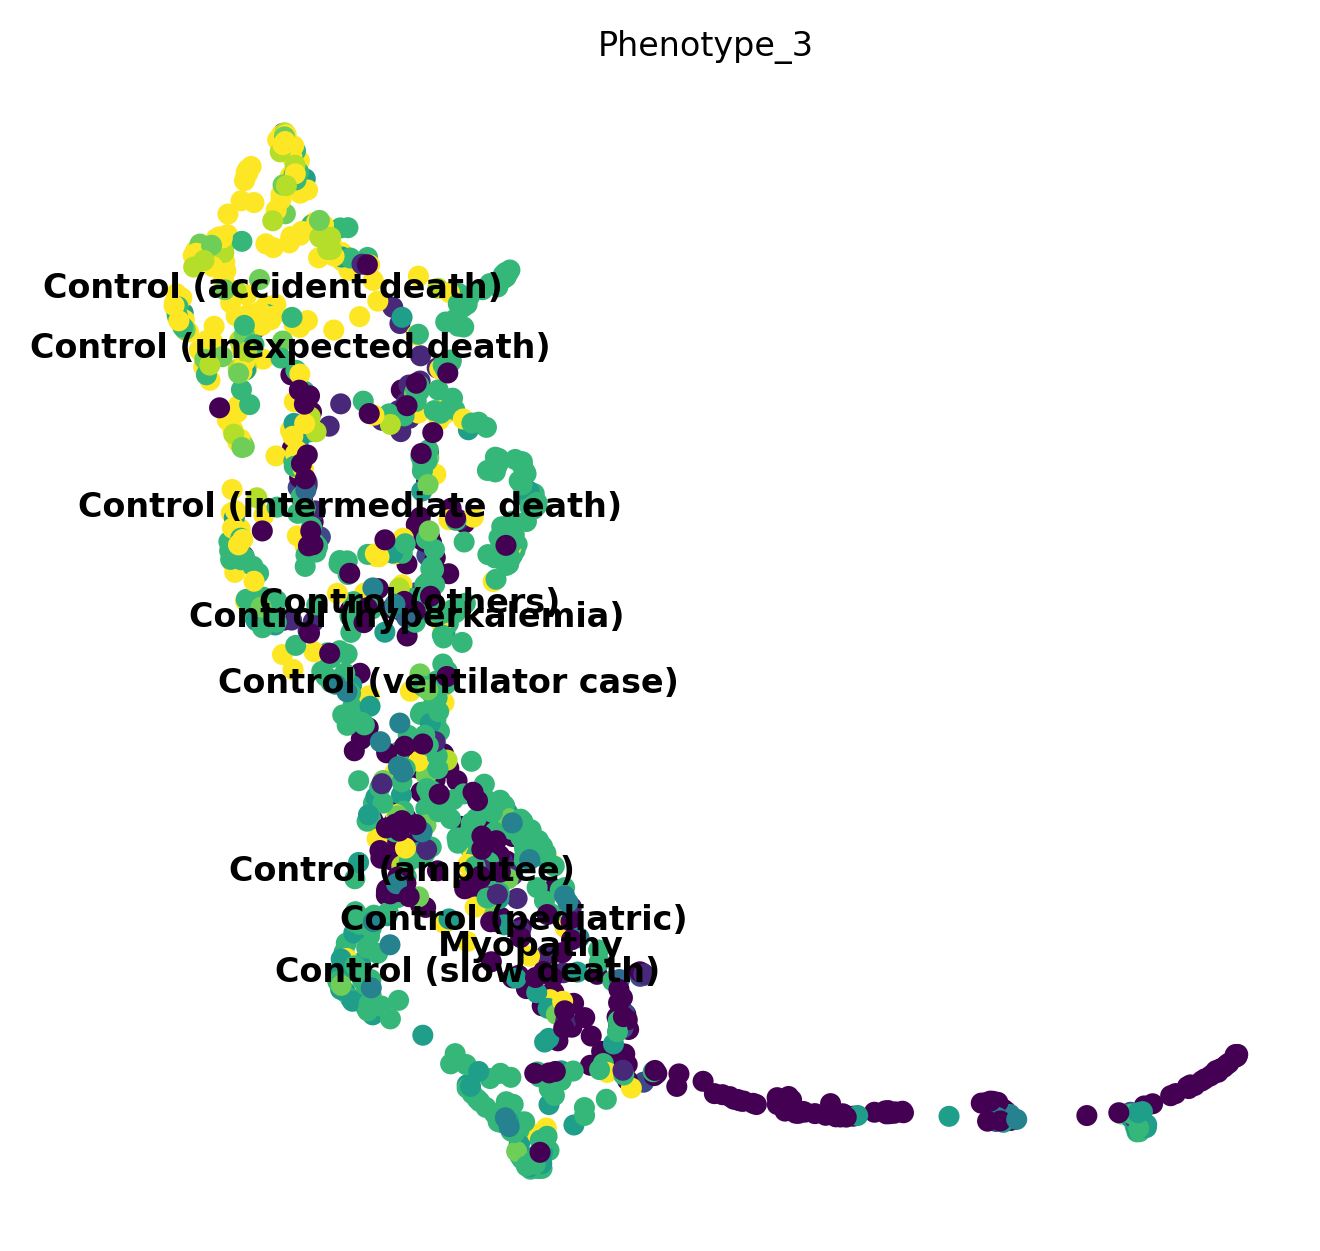

In [ ]:
sc.set_figure_params(dpi=150, dpi_save = 300,figsize=[5,5],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.draw_graph(adata_adj, color=['Phenotype_3'], legend_loc='on data')

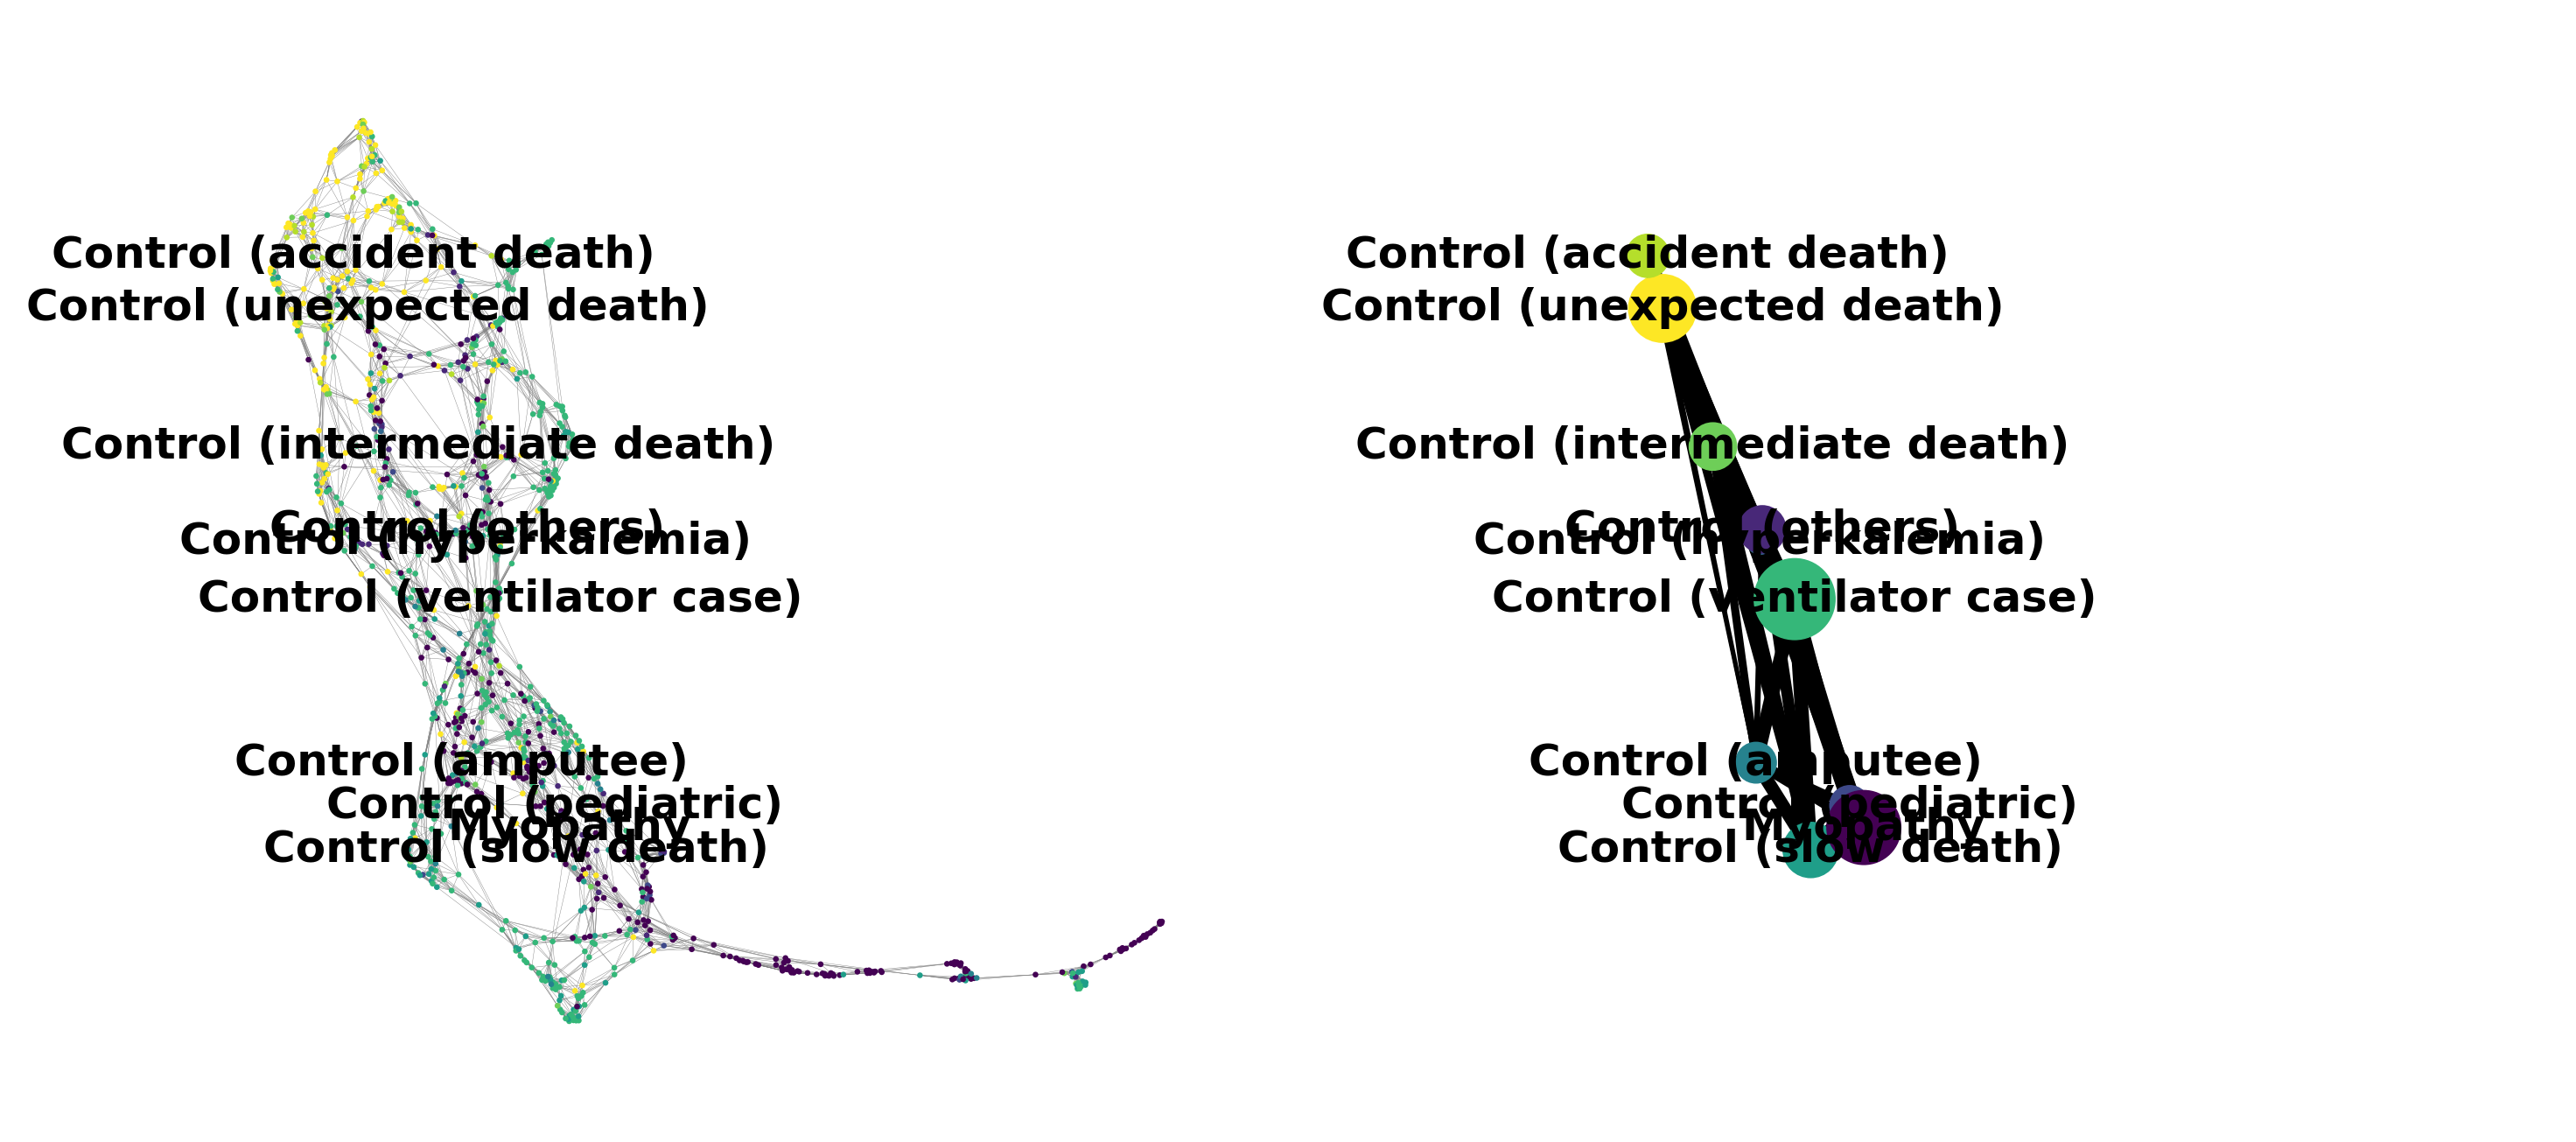

In [ ]:
sc.pl.paga_compare(
    adata_adj, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [ ]:
adata_adj.uns['iroot'] = np.flatnonzero(adata_adj.obs['Phenotype_3']  == 'Control (accident death)')[0]

In [ ]:
sc.tl.dpt(adata_adj)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


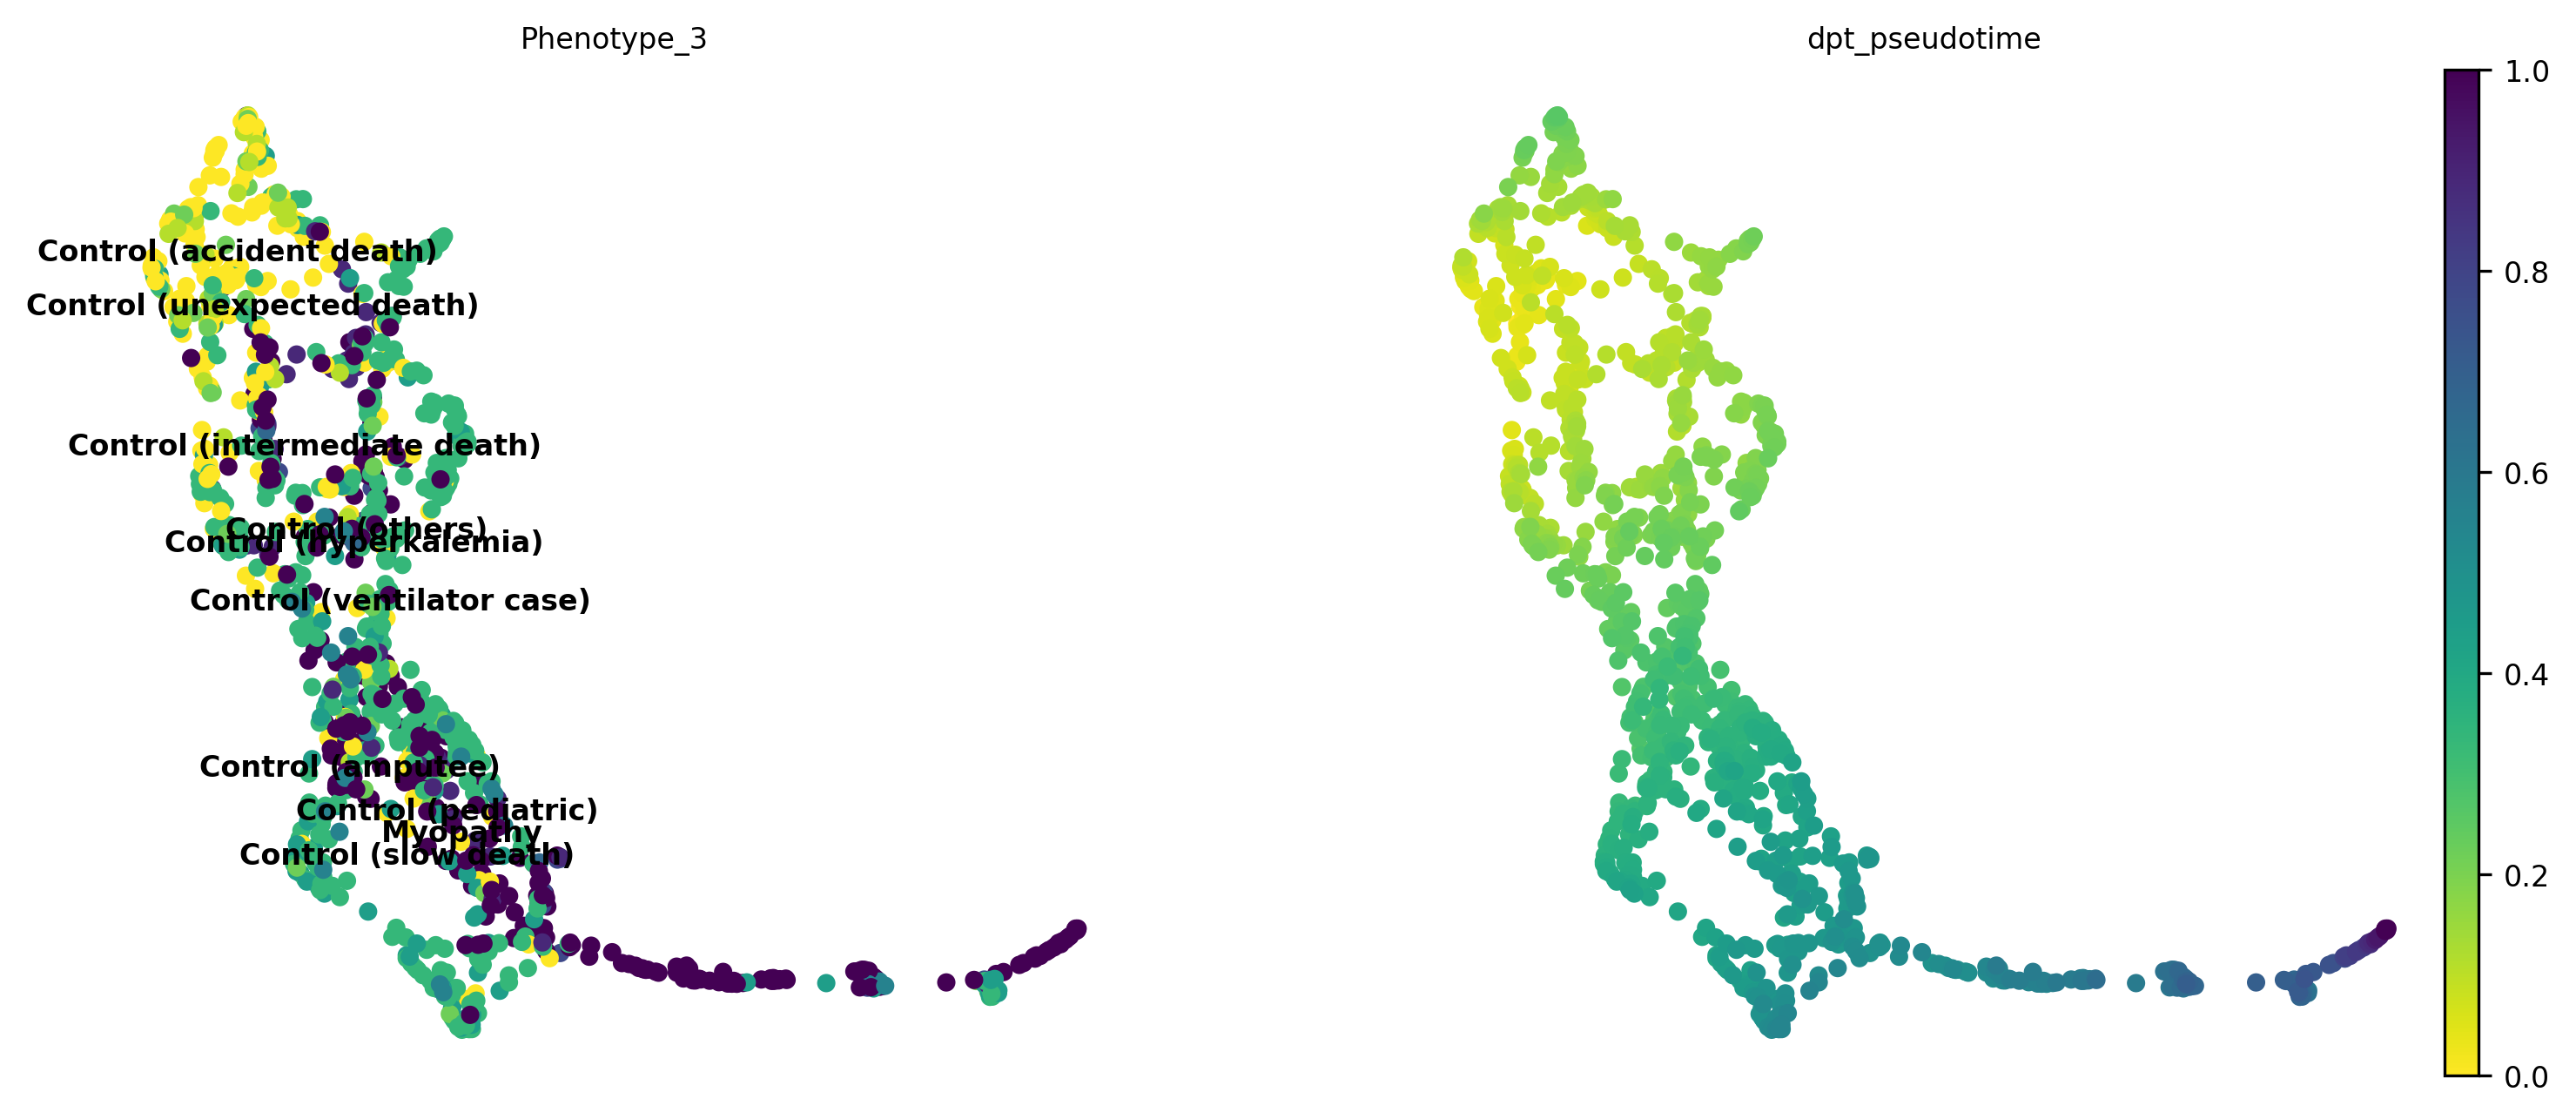

In [ ]:
sc.pl.draw_graph(adata_adj, color=['Phenotype_3', 'dpt_pseudotime'], legend_loc='on data')

In [ ]:
gene_names = ['NR4A3', 'CAPN3', 'ACTN3', 'NR4A1', 'DBNDD2', 'ERRFI1', 'GALNT15', 'FASN', 'ACSL4', 'SPIDR']

sc.pl.paga_path(
        adata_adj, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)